## Evolution of the cyclone intensity (EKE and pmin) of all simulations 

Partially taken from the script by Behrooz Keshtgar "Lorenz Energy Cycle" for the calculation of eddy kinetic energy (EKE)

In [18]:
# Import libraris

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

# loading external functions for Lorenz_calculation

import lec   # this python script contains functions for computing: vertical integral, numerical derivative,
             # ZAPE, EAPE, ZKE, EKE

In [19]:
# Dictionary for loading simulations
# test dataset
res = '80km'
res2 = '2km'
simdict = {
    '0001': {'res':res, 'case':'CTL'},    
    '0002': {'res':res, 'case':'T+4K'},
    '0003': {'res':res, 'case':'T+4K_RH-'},
    '0004': {'res':res, 'case':'T+anom'},
    '0005': {'res':res, 'case':'T+TRanom'},
    '0006': {'res':res, 'case':'T+POanom'},
         }


In [3]:
# Function to load

def load_simulations():
    
    ds_list = []
    
    for sim in list(simdict.keys()):
        
        print('Working on loading data for', sim)
        
        datapath='/work/bb1152/Module_A/A6_CyclEx/sim_data/production/'
        
        path = datapath+sim
        
        ds = xr.open_mfdataset(path+'/remapped_atm3d_latlon/icon-atm3d_PL_reg_con_202101*.nc')
        
        ds_list.append(ds)
        
        del ds

    return ds_list


In [4]:
# Loading simulations

tt=time.process_time()

ds_list_atm3d = load_simulations()

print('Time taken:', time.process_time() - tt,'seconds')

Working on loading data for channel_80km_0001
Working on loading data for channel_80km_0002
Working on loading data for channel_80km_0003
Working on loading data for channel_80km_0004
Working on loading data for channel_80km_0005
Working on loading data for channel_80km_0006
Working on loading data for channel_2km_0001
Working on loading data for channel_2km_0002
Working on loading data for channel_2km_0003
Working on loading data for channel_2km_0004
Working on loading data for channel_2km_0005
Working on loading data for channel_2km_0006
Time taken: 85.156605259 seconds


In [5]:
# select timesteps every 6 hours. Did not find a nicer way to do this.
#for i in range(0,len(ds_list_atm3d)):
for i in range(0,6):
    ds_list_atm3d[i] = ds_list_atm3d[i].isel(time=[0,
        6,
        12,
        18,
        24,
        30,
        36,
        42,
        48,
        54,
        60,
        66,
        72,
        78,
        84,
        90,
        96,
        102,
        108,
        114,
        120,
        126,
        132,
        138,
        144,
        150,
        156,
        162,
        168,
        174,
        180,
        186,
        192,
        198,
        204,
        210,
        216 ])

In [6]:
# set relative time-axis

for i in range(0,len(ds_list_atm3d)):

    ds_list_atm3d[i]["time"] = ds_list_atm3d[i].time - 20210100

In [7]:
# select subdomain without meridional boundaries

latmin = 10
latmax = 80

for i in range(0,len(ds_list_atm3d)):
    ds_list_atm3d[i] = ds_list_atm3d[i].sel(lat=slice(latmin,latmax))

In [8]:
ds_list_atm3d[0]

<xarray.Dataset>
Dimensions:   (time: 37, lon: 51, lat: 70, plev: 100, plev_2: 100, plev_3: 100)
Coordinates:
  * time      (time) float64 1.0 1.25 1.5 1.75 2.0 ... 9.0 9.25 9.5 9.75 10.0
  * lon       (lon) float64 12.5 13.5 14.5 15.5 16.5 ... 59.5 60.5 61.5 62.5
  * lat       (lat) float64 10.5 11.5 12.5 13.5 14.5 ... 76.5 77.5 78.5 79.5
  * plev      (plev) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
  * plev_2    (plev_2) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
  * plev_3    (plev_3) float64 1e+03 2e+03 3e+03 4e+03 ... 9.8e+04 9.9e+04 1e+05
Data variables:
    pres      (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    qv        (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    temp      (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    u         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    v         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    w         (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    z_ifc     (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    vor       (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    omega     (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    geopot    (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    div       (time, plev_3, lat, lon) float32 dask.array<chunksize=(1, 100, 70, 51), meta=np.ndarray>
    pres_sfc  (time, lat, lon) float32 dask.array<chunksize=(1, 70, 51), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 2.0.5 (https://...
    Conventions:               CF-1.6
    source:                    @
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    history:                   Fri Jul 15 08:07:45 2022: cdo -P 38 ap2pl,1000...
    references:                see MPIM/DWD publications
    comment:                   Nicole Knopf (b380906) on l40645 (Linux 4.18.0...
    cdo_openmp_thread_number:  38
    CDO:                       Climate Data Operators version 2.0.5 (https://...

In [9]:
# looping through simulations
def lorenz(num):
    print('Working on simulation:', num+1)
    # Loading dimentions and changing to np.array
    time = ds_list_atm3d[num].time.values 
    lev  = ds_list_atm3d[num].plev.values
    lat  = ds_list_atm3d[num].lat.values
    lon  = ds_list_atm3d[num].lon.values

    # lev, lat, lon must be increasing
    T  = ds_list_atm3d[num].temp.values
    u  = ds_list_atm3d[num].u.values
    v  = ds_list_atm3d[num].v.values
    w  = ds_list_atm3d[num].omega.values
    #-------------------------------------------------------------------------------------
    # Creating classes and checking the order of variables

    class expclass():

        def __init__(self,T,u,v,w,time,lev,lat,lon):

            self.T     = np.array(T)     # temperature
            self.u     = np.array(u)
            self.v     = np.array(v)
            self.w     = np.array(w)
            self.time  = np.array(time)
            self.lev   = np.array(lev)
            self.lat   = np.array(lat)
            self.lon   = np.array(lon)
            self.ntime = np.size(time)
            self.nlev  = np.size(lev)
            self.nlat  = np.size(lat)
            self.nlon  = np.size(lon)
            self.zape  = np.full(self.ntime,np.nan,dtype=float)
            self.eape  = np.full(self.ntime,np.nan,dtype=float)
            self.zke   = np.full(self.ntime,np.nan,dtype=float)
            self.eke   = np.full(self.ntime,np.nan,dtype=float)
            self.ekemax= np.full(self.ntime,np.nan,dtype=float)
            if ( (np.shape(self.T)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or  
                 (np.shape(self.u)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or
                 (np.shape(self.v)    != (self.ntime,self.nlev,self.nlat,self.nlon)) or
                 (np.shape(self.w)    != (self.ntime,self.nlev,self.nlat,self.nlon))):
                print(self.T.shape, self.ntime, self.nlev, self.nlat, self.nlon)
                raise ValueError()
             #lev, lat, lon dimensions must be increasing    
            for k in range(self.nlev-1):
                if self.lev[k] > self.lev[k+1]:
                    raise ValueError()
            for k in range(self.nlat-1):
                if self.lat[k] > self.lat[k+1]:
                    print(k, lat[k], lat[k+1])
                    raise ValueError()       
            for k in range(self.nlon-1):
                if self.lon[k] > self.lon[k+1]:
                    raise ValueError()
    #-------------------------------------------------------------------
    # calling fuctions for computation
    exp=expclass(T,u,v,w,time,lev,lat,lon) #(T,u,v,w,d,Q,time,lev,lat,lon)

    for t in range(exp.ntime):
        #print('Working on time step:',t)
        exp.zape[t] = lec.calc_zape(np.nanmean(exp.T[t],axis=2),exp.lev,exp.lat)
        exp.zke [t] = lec.calc_zke (np.nanmean(exp.u[t],axis=2),np.nanmean(exp.v[t],axis=2),exp.lev,exp.lat)
        exp.eape[t] = lec.calc_eape(exp.T[t],exp.lev,exp.lat,exp.lon)
        exp.eke [t], exp.ekemax[t]  = lec.calc_eke (exp.u[t],exp.v[t],exp.lev,exp.lat,exp.lon)

    # Putting all derived vars and return them
    #list_var = [exp.zape,exp.zke,exp.eape,exp.eke]
    return(exp)

In [10]:
ds_lec_rad = []
for i in range(0,len(ds_list_atm3d)):
    rad=lorenz(i)
    ds_lec_rad.append(rad)

Working on simulation: 1


/tmp/ipykernel_1074588/3729600734.py:62: RuntimeWarning: Mean of empty slice
  exp.zape[t] = lec.calc_zape(np.nanmean(exp.T[t],axis=2),exp.lev,exp.lat)
/tmp/ipykernel_1074588/3729600734.py:63: RuntimeWarning: Mean of empty slice
  exp.zke [t] = lec.calc_zke (np.nanmean(exp.u[t],axis=2),np.nanmean(exp.v[t],axis=2),exp.lev,exp.lat)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:106: RuntimeWarning: Mean of empty slice
  Tzm = np.nanmean(T,axis=2)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:197: RuntimeWarning: Mean of empty slice
  uzm = np.nanmean(u,axis=2)
/home/b/b382037/icon-climxtreme/FF_figures_manuscript/lec.py:198: RuntimeWarning: Mean of empty slice
  vzm = np.nanmean(v,axis=2)


Working on simulation: 2
Working on simulation: 3
Working on simulation: 4
Working on simulation: 5
Working on simulation: 6
Working on simulation: 7
Working on simulation: 8
Working on simulation: 9
Working on simulation: 10
Working on simulation: 11
Working on simulation: 12


CTL
30 1210483.173502173
8.5
T+4K
27 1176253.0620423772
7.75
T+4K_RH-
31 1177370.9023474122
8.75
T+anom
27 1119048.7653988653
7.75
T+TRanom
24 1224480.3961313197
7.0
T+POanom
33 1022649.0401874025
9.25
CTL
30 1253654.2355063313
8.5
T+4K
28 1160087.6602562713
8.0
T+4K_RH-
33 1194500.9631877006
9.25
T+anom
28 1146018.4640787493
8.0
T+TRanom
24 1195251.4146626252
7.0
T+POanom
35 1089945.0496174414
9.75


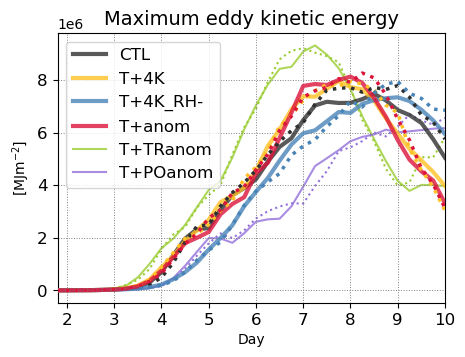

In [11]:
#colors={1:'k',2:'gold',3:'mediumseagreen',4:'crimson',5:'darkred',6:'lightcoral'}
#colors={1:'dimgray',2:'gold',3:'royalblue',4:'#E85F5C',5:'darkorange',6:'mediumseagreen'}
#colors={1:'dimgray',2:'#FFC125',3:'cornflowerblue',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}

plt.rcParams['savefig.facecolor']='white'
#####################################################
# EKE
#####################################################
fig = plt.figure(figsize=(5, 3.5))
fs=12
#print ( ds_lec_rad[0].time )
for i in range(0,6):
    print ( simdict['channel_80km_000'+ str(i+1)]['case'] )
    idmax= np.argmax(ds_lec_rad[i].eke)
    print ( idmax, np.max(ds_lec_rad[i].eke) )
    print ( ds_lec_rad[i].time[idmax])
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

for i in range(6,12):
    print ( simdict['channel_2km_000'+ str(i-5)]['case'] )
    idmax= np.argmax(ds_lec_rad[i].eke)
    print ( idmax, np.max(ds_lec_rad[i].eke) )
    print ( ds_lec_rad[i].time[idmax])

    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=2.5,zorder=6)


plt.ylabel('[MJm$^{-2}$]')
plt.xlabel('Day')
plt.legend(fontsize=fs)
#plt.xlim(0.8, 10)
plt.xlim(1.8, 10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.arange(2, 11, step=1), fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Maximum eddy kinetic energy', fontsize=14)
#plt.savefig('FigS_maxEKE_all_2km_vs_80km.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()


0 channel_80km_0001
35 942.3345336914062
7.5
1 channel_80km_0002
35 940.8253173828124
7.5
2 channel_80km_0003
35 946.77587890625
7.75
3 channel_80km_0004
35 940.3123168945312
7.0
4 channel_80km_0005
35 935.8981323242188
6.5
5 channel_80km_0006
35 951.910888671875
8.75
6 channel_2km_0001
35 943.6886596679688
7.75
7 channel_2km_0002
35 941.9033813476562
7.0
8 channel_2km_0003
35 945.6936645507812
7.75
9 channel_2km_0004
35 939.2540893554688
7.25
10 channel_2km_0005
35 936.572265625
6.5
11 channel_2km_0006
35 945.6761474609376
8.0


Text(0.5, 1.0, 'Central pressure')

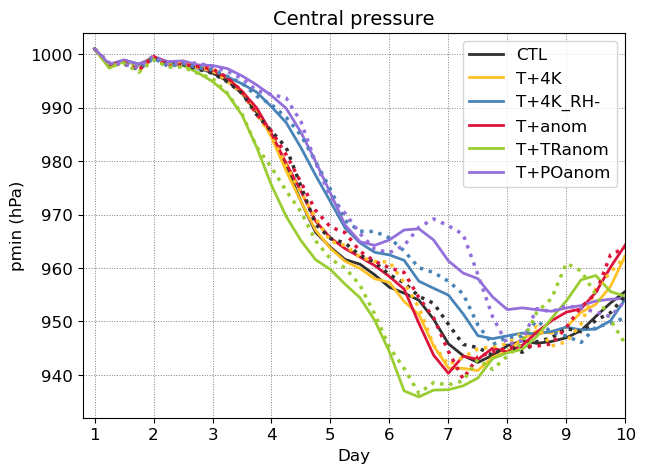

In [12]:
import pandas as pd
#####################################################
# Minimum pressure 
#####################################################
plt.rcParams['savefig.facecolor']='white'
fig = plt.figure(figsize=(7, 5))
#colors={1:'k',2:'orange',3:'mediumseagreen',4:'crimson',5:'violet',6:'royalblue'}
fs=12

#Cyclone Track
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    
    idmin= np.argmin(df_track['pmin'])
    print ( idmax, np.min(df_track['pmin']) )
    print ( df_track['time'][idmin]+1)
    if count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=2, label= simdict['channel_80km_000'+ str(count+1)]['case']) 
    else:
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5)
      
   
plt.xticks(np.arange(1,11,1))
plt.legend(fontsize=fs)
plt.ylim(932, 1004)
#plt.ylim(938, 1004)
plt.xlim(0.8, 10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Day',fontsize=12)
plt.ylabel('pmin (hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Central pressure', fontsize=14)
#fig.savefig('Centralpressure_all_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)


0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


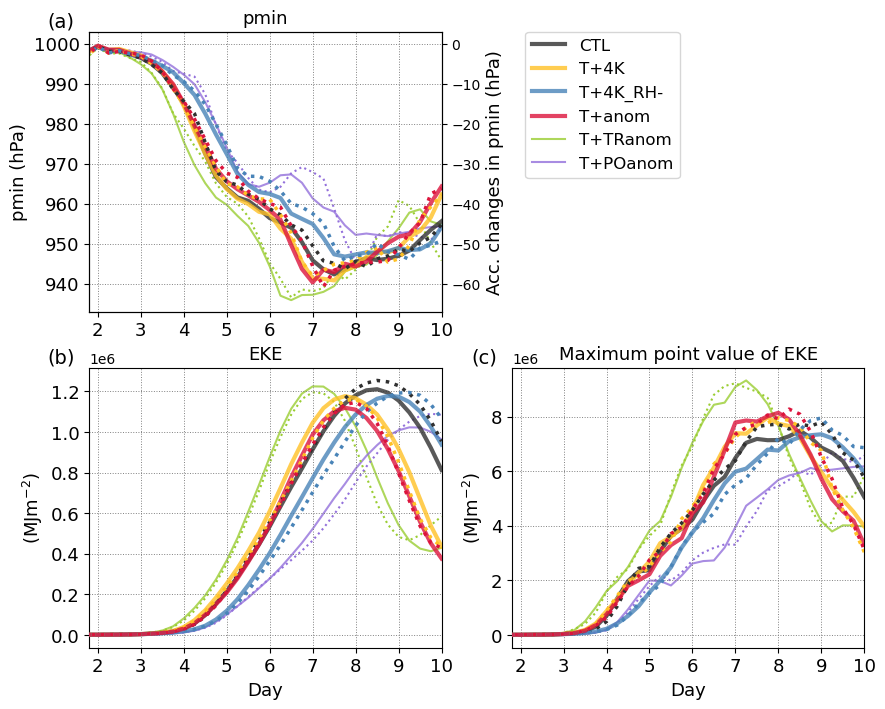

In [13]:
#####################################################
# Combined
#####################################################
fig = plt.figure(figsize=(10, 8))
fs=12

ax1 = plt.subplot(2,2,3)


        
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5], linestyle='dotted',linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5], linestyle='dotted',linewidth=2.5,zorder=6)


plt.ylabel('(MJm$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE', fontsize=13)

ax2 = plt.subplot(2,2,1)
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    if count >= 6: 
    # 2km first
        if count >=10:
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
        else:
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    else:
        if count >=4: 
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
        else: 
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs, bbox_to_anchor=(1.7, 1.03))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin', fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
ax3.set_ylabel('Acc. changes in pmin (hPa)', fontsize=13)
#ax1.tick_params(axis='y', colors='orange')

ax4 = plt.subplot(2,2,4)


        
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=2.5,zorder=6)


plt.ylabel('(MJm$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Maximum point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

#plt.savefig('Fig_Cycloneintensity_all_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()

0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


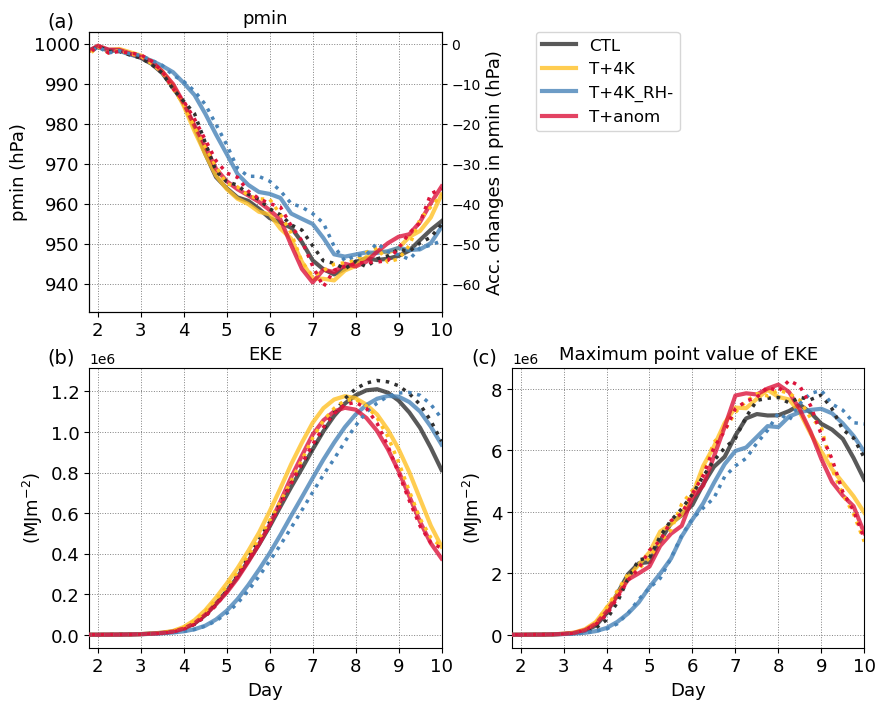

In [14]:
#####################################################
# Combined
#####################################################
fig = plt.figure(figsize=(10, 8))
fs=12

ax1 = plt.subplot(2,2,3)


        
for i in range(0,4):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

for i in range(6,10):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5], linestyle='dotted',linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5], linestyle='dotted',linewidth=2.5,zorder=6)


plt.ylabel('(MJm$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE', fontsize=13)

ax2 = plt.subplot(2,2,1)
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    if count >= 6: 
    # 2km first
        if count <10:
            #plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
        #else:
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    else:
        if count <4: 
        #    plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
        #else: 
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs, bbox_to_anchor=(1.7, 1.03))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin', fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
ax3.set_ylabel('Acc. changes in pmin (hPa)', fontsize=13)
#ax1.tick_params(axis='y', colors='orange')

ax4 = plt.subplot(2,2,4)


        
for i in range(0,4):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

for i in range(6,10):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5], linestyle='dotted',linewidth=2.5,zorder=6)


plt.ylabel('(MJm$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Maximum point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

#plt.savefig('Fig_Cycloneintensity_6hres_2km_vs_80km_untilDay10_Fourexps.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()

0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006
0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


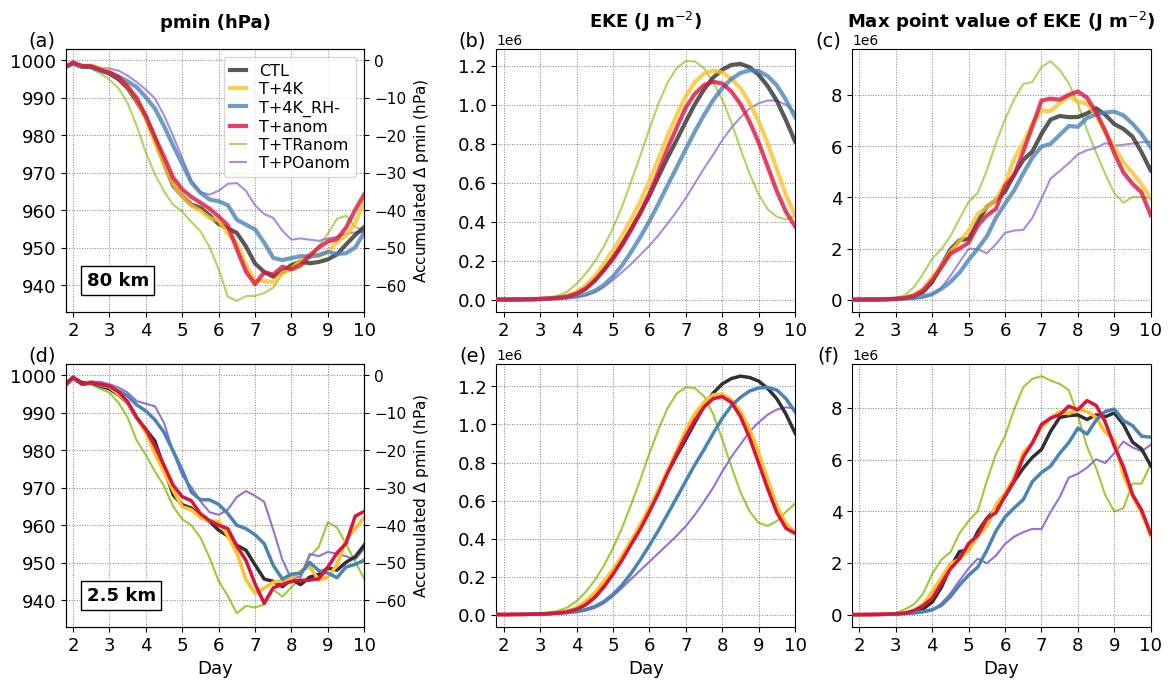

In [15]:
#####################################################
# Separate the 80 km and 2.5 km runs
#####################################################
fig = plt.figure(figsize=(14, 7.5))
fs=11.5

spec = fig.add_gridspec(ncols=4, nrows=2, width_ratios=[1,0.06,1,1],
                          height_ratios=[1,1])

ax2 = fig.add_subplot(spec[0, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #    if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
    #    else:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    #else:
    if count >=4 and count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
    elif count < 6: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.2)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin (hPa)', fontsize=13,y=1.05,weight='bold')

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[0, 2])
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)



#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



ax4 = fig.add_subplot(spec[0, 3])

        
for i in range(0,6):
    if i >=4: 
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Max point value of EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

ax2.text(0.07,0.1,'80 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)
#==========================================================


ax2 = fig.add_subplot(spec[1, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    if count >=10:
            plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linewidth=1.5, zorder=0)
    elif count >=6 and count <10:
           plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5],  linewidth=2.5, zorder=6 )
    
#x2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.3)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('pmin', fontsize=13)
plt.xlabel('Day',fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[1, 2])
for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=2.5,zorder=6)


#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('EKE', fontsize=13)



ax4 = fig.add_subplot(spec[1, 3])

        
for i in range(6,12):
    # 2km 
    if i >=10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=1.5,zorder=0)
    else:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=2.5,zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('Max point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(e)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(d)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(f)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 


ax2.text(0.07,0.1,'2.5 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)


plt.subplots_adjust(wspace = 0.25, hspace = 0.2)

#plt.savefig('Fig3p_Cycloneintensity_all_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()

0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006
0 channel_80km_0001
1 channel_80km_0002
2 channel_80km_0003
3 channel_80km_0004
4 channel_80km_0005
5 channel_80km_0006
6 channel_2km_0001
7 channel_2km_0002
8 channel_2km_0003
9 channel_2km_0004
10 channel_2km_0005
11 channel_2km_0006


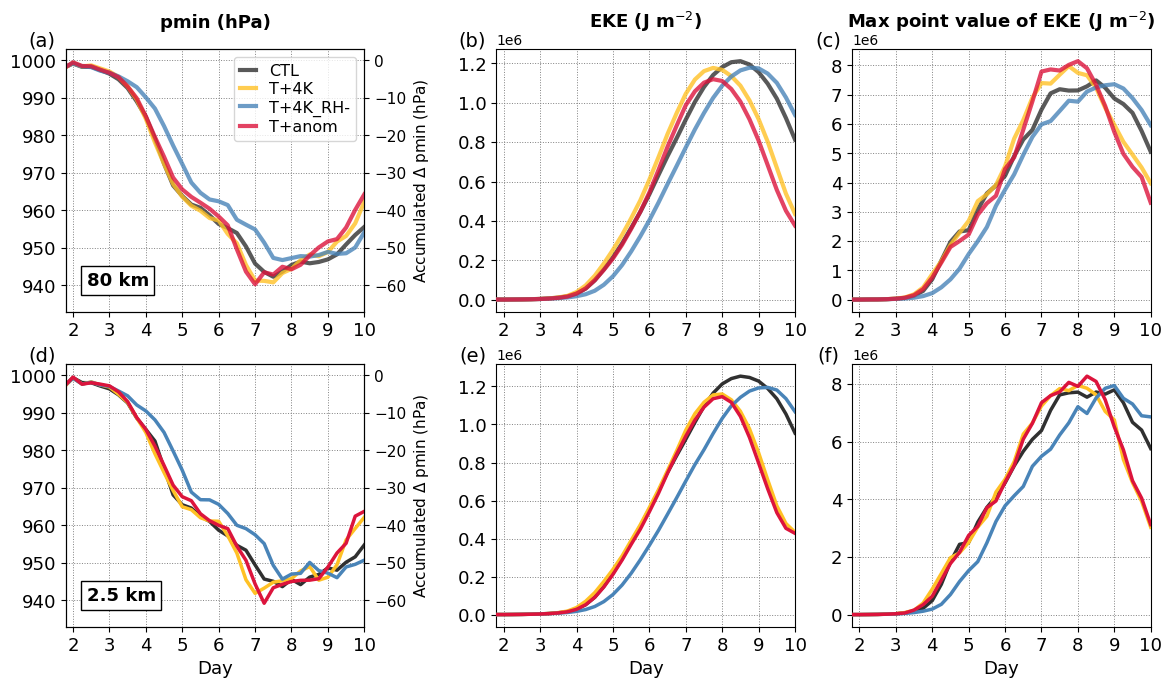

In [17]:
#####################################################
# Separate the 80 km and 2.5 km runs
#####################################################
fig = plt.figure(figsize=(14, 7.5))
fs=11.5

spec = fig.add_gridspec(ncols=4, nrows=2, width_ratios=[1,0.06,1,1],
                          height_ratios=[1,1])

ax2 = fig.add_subplot(spec[0, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #    if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
    #    else:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    #else:
    #if count >=4 and count < 6: 
    #    plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
    if count < 4: 
        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'],zorder=6  )
        
ax2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.2)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('pmin (hPa)', fontsize=13,y=1.05,weight='bold')

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[0, 2])
for i in range(0,6):
    #if i >=4: 
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    if i < 4:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)



#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



ax4 = fig.add_subplot(spec[0, 3])

        
for i in range(0,6):
    #if i >=4: 
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=1.5,  alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=0)
    if i <4:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i+1], linewidth=3, alpha=0.8, label= simdict['channel_80km_000'+ str(i+1)]['case'], zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
#plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Max point value of EKE (J m$^{-2}$)', fontsize=13,y=1.05,weight='bold')



plt.text(-0.08, 1.07, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(a)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(c)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 

ax2.text(0.07,0.1,'80 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)
#==========================================================


ax2 = fig.add_subplot(spec[1, 0])
for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linewidth=1.5, zorder=0)
    if count >=6 and count <10:
           plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5],  linewidth=2.5, zorder=6 )
    
#x2.legend(fontsize=fs,handlelength=1.0,labelspacing=0.3)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
plt.ylim(933, 1003)
#plt.ylim(938, 1004)
plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
#plt.xlabel('Day',fontsize=12)
#plt.ylabel('pmin (hPa)',fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('pmin', fontsize=13)
plt.xlabel('Day',fontsize=13)

ax3 = ax2.twinx()
ax3.set_ylim((-67, 3))
plt.yticks(fontsize=11)
ax3.set_ylabel('Accumulated ' r'$\Delta$'' pmin (hPa)', fontsize=11)
#ax1.tick_params(axis='y', colors='orange')

ax1 = fig.add_subplot(spec[1, 2])
for i in range(6,12):
    # 2km 
    #if i >=10:
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=1.5,zorder=0)
    if i <10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].eke, c=colors[i-5],linewidth=2.5,zorder=6)


#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('EKE', fontsize=13)



ax4 = fig.add_subplot(spec[1, 3])

        
for i in range(6,12):
    # 2km 
    #if i >=10:
    #    plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=1.5,zorder=0)
    if i <10:
        plt.plot(ds_lec_rad[i].time,ds_lec_rad[i].ekemax, c=colors[i-5],linewidth=2.5,zorder=6)

#plt.ylabel('(J m$^{-2}$)',fontsize=13)
plt.xlabel('Day',fontsize=13)

plt.xlim(1.8, 10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
#plt.title('Max point value of EKE', fontsize=13)

plt.text(-0.08, 1.07, '(e)', ha='center', va='top', transform=ax1.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(d)', ha='center', va='top', transform=ax2.transAxes, fontsize=14) 
plt.text(-0.08, 1.07, '(f)', ha='center', va='top', transform=ax4.transAxes, fontsize=14) 


ax2.text(0.07,0.1,'2.5 km',
                     ha='left',
                     weight='bold',fontsize=13,
                     bbox=dict(ec='k',fc='white'),
                     transform=ax2.transAxes)


plt.subplots_adjust(wspace = 0.25, hspace = 0.2)

plt.savefig('Fig3_Cycloneintensity_4exp_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
#plt.savefig('./' + 'eke_' + '_allsims_' + res + '_EXP1-4.png', bbox_inches='tight',dpi=100)
plt.show()

In [30]:
import pandas as pd
colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}

plt.rcParams['savefig.facecolor']='white'
#####################################################
# Separate the 80 km and 2.5 km runs
#####################################################
fig = plt.figure(figsize=(6, 5))
fs=11.5


for count, sim in enumerate(list(simdict.keys())):
    print (count, sim)
    path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_tracks/'
    df_track = pd.read_csv(path_track+'Track_for_channel_80km_'+sim+'_6hrly_1x1latlon.csv')
    df_track2 = pd.read_csv(path_track+'Track_for_channel_2km_'+sim+'_6hrly_1x1latlon.csv')
    #if count >= 6: 
    # 2km first
    #    if count >=10:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=1.5, zorder=0)
    #    else:
    #        plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count-5], linestyle='dotted', linewidth=2.5, zorder=6 )
    #else:
    #if count >=4 and count < 6: 
    #    plt.plot(df_track['time']+1, df_track['pmin'],   color=colors[count+1], linewidth=1.5, alpha=0.8,label= simdict['channel_80km_000'+ str(count+1)]['case'], zorder=0)
    if count < 4: 
        plt.plot(df_track['time']+1, df_track2['pmin']-df_track['pmin'],   color=colors[count+1], linewidth=3, alpha=0.8,label= simdict['000'+ str(count+1)]['case'],zorder=6  )

plt.axhline(y=0,linestyle='dotted',color='k')
plt.legend(fontsize=fs,handlelength=1.0,labelspacing=0.2)#, bbox_to_anchor=(0.4, 0.95))
#plt.legend(fontsize=fs)
#plt.ylim(933, 1003)
plt.ylim(-10, 10)
plt.xlim(3, 8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xticks(np.arange(2, 11, step=1), fontsize=13)
plt.xlabel('Day',fontsize=12)
plt.ylabel('(hPa)',fontsize=12)
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.title('Difference in pmin (''2.5 km'r'$-$''80 km)', fontsize=13,y=1.05,weight='bold')



#plt.savefig('Fig3_Cycloneintensity_4exp_6hres_2km_vs_80km_untilDay10.png', bbox_inches='tight',dpi=100)
plt.savefig('./pmin_diff_2km_minus_80km.png', bbox_inches='tight',dpi=100)
plt.show()

0 0001
1 0002
2 0003
3 0004
4 0005
5 0006
